# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf
import numpy as np
# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer'
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.0
Default GPU Device: /gpu:0


In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def plot_movement(results):
    plt.plot(results['time'], results['x'], label='x')
    plt.plot(results['time'], results['y'], label='y')
    plt.plot(results['time'], results['z'], label='z')
    plt.legend()
    _ = plt.ylim()

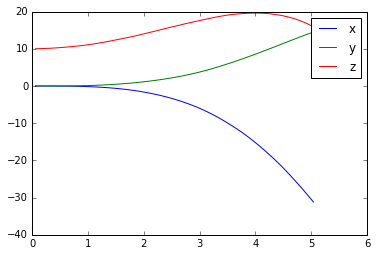

In [5]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    
    while True:
        #rotor_speeds =
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break
plot_movement(results)


In [8]:
def plot_rotor_speed(results):

    plt.plot(results['time'], results['rotor_speed1'], label='speed1')
    plt.plot(results['time'], results['rotor_speed2'], label='speed2')
    plt.plot(results['time'], results['rotor_speed3'], label='speed3')
    plt.plot(results['time'], results['rotor_speed4'], label='speed4')
    plt.legend()
    _ = plt.ylim()
    plt.show()

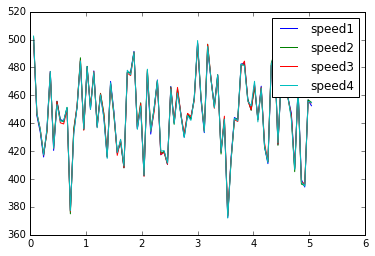

In [12]:
plot_rotor_speed(results)

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

The next code cell visualizes the velocity of the quadcopter.

In [10]:
def plot_velocity(results):
    plt.plot(results['time'], results['x_velocity'], label='x_hat')
    plt.plot(results['time'], results['y_velocity'], label='y_hat')
    plt.plot(results['time'], results['z_velocity'], label='z_hat')
    plt.legend()
    _ = plt.ylim()

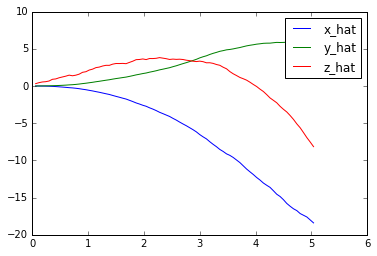

In [13]:
plot_velocity(results)

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

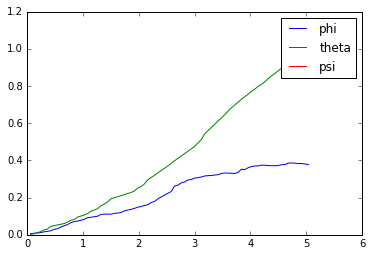

In [11]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

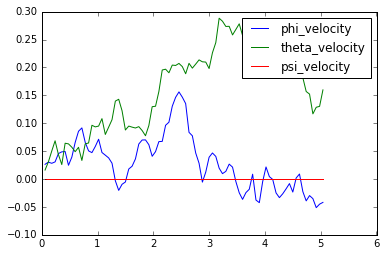

In [14]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

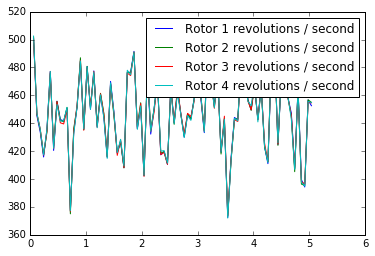

In [15]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [16]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-31.18661489  14.49928982  15.91179899   0.3778328    1.0045833    0.        ]
[-18.40093713   5.27220827  -8.15353032]
[-0.04191877  0.15970061  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [17]:
from __future__ import print_function

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [18]:
import numpy as np
from physics_sim import PhysicsSim

class Task():
    """Task (environment) that defines the goal and provides feedback to the agent."""
    def __init__(self, init_pose=None, init_velocities=None, 
        init_angle_velocities=None, runtime=5., target_pos=None):
        """Initialize a Task object.
        Params
        ======
            init_pose: initial position of the quadcopter in (x,y,z) dimensions and the Euler angles
            init_velocities: initial velocity of the quadcopter in (x,y,z) dimensions
            init_angle_velocities: initial radians/second for each of the three Euler angles
            runtime: time limit for each episode
            target_pos: target/goal (x,y,z) position for the agent
        """
        # Simulation
        self.sim = PhysicsSim(init_pose, init_velocities, init_angle_velocities, runtime) 
        self.action_repeat = 3

        self.state_size = self.action_repeat * 6
        self.action_low = 404
        self.action_high = 405
        self.action_size = 3
        self.action_space = [404,402,406]
        # Goal
        self.target_pos = target_pos if target_pos is not None else np.array([0., 0., 25.]) 

    def get_reward(self):
        """Uses current pose of sim to return reward."""
        # at 404 its stays stable 
        # if all 4 rotors have the same speed it will go straight up
        reward = 1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum()
        return reward

    def step(self, action):
        """Uses action to obtain next state, reward, done."""
        reward = 0
        pose_all = []
        x = self.action_space[action]
        rotor_speeds = np.array([x,x,x,x])
        for _ in range(self.action_repeat):
            done = self.sim.next_timestep(rotor_speeds) # update the sim pose and velocities
            reward += self.get_reward() 
            pose_all.append(self.sim.pose)
        next_state = np.concatenate(pose_all)
        return next_state, reward, done

    def reset(self):
        """Reset the sim to start a new episode."""
        self.sim.reset()
        state = np.concatenate([self.sim.pose] * self.action_repeat) 
        return state

In [19]:
def get_random_action():
    '''  '''
    # 0 stay 1 up 2 down
    # 2 down
    action = np.random.choice([0,1,2])
    
    return action

In [20]:
import tensorflow as tf

class QNetwork:
    def __init__(self, learning_rate=0.01, state_size=18, 
                 action_size=3, hidden_size=10, dropout=0.7,
                 name='QNetwork'):
        # state inputs to the Q-network
        with tf.variable_scope(name):
            self.inputs_ = tf.placeholder(tf.float32, [None, state_size], name='inputs')
            
            # One hot encode the actions to later choose the Q-value for the action
            self.actions_ = tf.placeholder(tf.int32, [None], name='actions')
            #one_hot_actions = tf.one_hot(self.actions_, action_size)
            one_hot_actions = tf.one_hot(self.actions_, action_size)
            # Target Q values for training
            self.targetQs_ = tf.placeholder(tf.float32, [None], name='target')
            
            # ReLU hidden layers
            self.fc1 = tf.contrib.layers.fully_connected(self.inputs_, hidden_size)
            self.fc2 = tf.contrib.layers.dropout(self.fc1,dropout)
            self.fc3 = tf.contrib.layers.fully_connected(self.fc2, hidden_size)
            self.fc4 = tf.contrib.layers.dropout(self.fc3,dropout)
            self.fc5 = tf.contrib.layers.fully_connected(self.fc4, hidden_size)
            

            # Linear output layer
            self.output = tf.contrib.layers.fully_connected(self.fc5, action_size, 
                                                            activation_fn=None)
            
            ### Train with loss (targetQ - Q)^2
            # output has length 2, for two actions. This next line chooses
            # one value from output (per row) according to the one-hot encoded actions.
            self.Q = tf.reduce_sum(tf.multiply(self.output, one_hot_actions), axis=1)
            
            self.loss = tf.reduce_mean(tf.square(self.targetQs_ - self.Q))
            self.opt = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)

In [27]:
from collections import deque

class Memory():
    def __init__(self, max_size=1000):
        self.buffer = deque(maxlen=max_size)
    
    def add(self, experience):
        self.buffer.append(experience)
            
    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)), 
                               size=batch_size, 
                               replace=False)
        return [self.buffer[ii] for ii in idx]

In [33]:
train_episodes = 2000          # max number of episodes to learn from
max_steps = 200                # max steps in an episode
gamma = 0.99                   # future reward discount

# Exploration parameters
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.0001            # exponential decay rate for exploration prob

# Network parameters
hidden_size = 64               # number of units in each Q-network hidden layer
learning_rate = 0.0001         # Q-network learning rate

# Memory parameters
memory_size = 10000            # memory capacity
batch_size = 20                # experience mini-batch size
pretrain_length = batch_size   # number experiences to pretrain the memory

In [29]:
tf.reset_default_graph()
mainQN = QNetwork(name='main', hidden_size=hidden_size, learning_rate=learning_rate)

In [30]:
def discretize_state(state, float_numbers=4):
    '''  '''
    for i, s in enumerate(state):
        state[i] = round(s, float_numbers)
    return state

In [31]:
# Initialize the simulation
env = Task()
env.reset()
action = get_random_action()
state, reward, done = env.step(action)

memory = Memory(max_size=memory_size)

# Make a bunch of random actions and store the experiences
for ii in range(pretrain_length):

    # Make a random action
    action = get_random_action()
    
    next_state, reward, done  = env.step(action)
    if done:
        # The simulation fails so no next state
        next_state = np.zeros(state.shape)
        # Add experience to memory
        memory.add((state, action, reward, next_state))
        
        # Start new episode
        env.reset()
        # Take one random step to get the pole and cart moving
        state, reward, done  = env.step(env.action_space.sample())
    else:
        # Add experience to memory
        memory.add((state, action, reward, next_state))
        state = next_state

In [34]:
def reward_function(state, task, action):
    ''' '''
    # 0 stay
    # 1 down
    # 2 up
    z_current = state[2] 
    z_target = task.target_pos[2]
    z_dif = abs(z_target - z_current) / z_target
    if z_current < z_target:
        if action == 2:
            return 1 - np.tanh(z_dif)
        else:
            return -1
    if z_current > z_target:
        if action == 1:
            return 1 - np.tanh(z_dif)
        else:
            return -1
    return 1
            

Episode: 1 Total reward: -40.1223763427 Training loss: 23.0606 Explore P: 0.9917
Episode: 2 Total reward: -42.9838103245 Training loss: 13.8684 Explore P: 0.9835
Episode: 3 Total reward: -34.2001656956 Training loss: 8.1501 Explore P: 0.9754
Episode: 4 Total reward: -42.9650008916 Training loss: 13.5065 Explore P: 0.9673
Episode: 5 Total reward: -40.110347343 Training loss: 12.4786 Explore P: 0.9593
Episode: 6 Total reward: -34.2029702941 Training loss: 1.6763 Explore P: 0.9513
Episode: 7 Total reward: -35.6469651857 Training loss: 1.4328 Explore P: 0.9435
Episode: 8 Total reward: -32.7243839493 Training loss: 1.3329 Explore P: 0.9357
Episode: 9 Total reward: -56.2157121516 Training loss: 5.6021 Explore P: 0.9279
Episode: 10 Total reward: -35.6828638862 Training loss: 7.0910 Explore P: 0.9202
Episode: 11 Total reward: -43.0184437548 Training loss: 0.7226 Explore P: 0.9126
Episode: 12 Total reward: -32.7421574305 Training loss: 0.5867 Explore P: 0.9051
Episode: 13 Total reward: -35.6517

Episode: 102 Total reward: -10.5463969414 Training loss: 6.2981 Explore P: 0.4303
Episode: 103 Total reward: -4.64944054478 Training loss: 22.8356 Explore P: 0.4268
Episode: 104 Total reward: -4.78256183334 Training loss: 8.0436 Explore P: 0.4233
Episode: 105 Total reward: -6.13971925075 Training loss: 12.3223 Explore P: 0.4198
Episode: 106 Total reward: -4.68727266112 Training loss: 12.7379 Explore P: 0.4164
Episode: 107 Total reward: -12.0279440072 Training loss: 12.2089 Explore P: 0.4130
Episode: 108 Total reward: -3.24301845179 Training loss: 12.7714 Explore P: 0.4096
Episode: 109 Total reward: -23.9173903675 Training loss: 10.9795 Explore P: 0.4063
Episode: 110 Total reward: -1.75482048678 Training loss: 11.7849 Explore P: 0.4030
Episode: 111 Total reward: -3.21186200795 Training loss: 7.8172 Explore P: 0.3997
Episode: 112 Total reward: -15.0126511457 Training loss: 7.7450 Explore P: 0.3964
Episode: 113 Total reward: -4.67171624362 Training loss: 12.7974 Explore P: 0.3932
Episode:

Episode: 202 Total reward: -6.23312691741 Training loss: 15.7931 Explore P: 0.1914
Episode: 203 Total reward: -19.4342504445 Training loss: 8.3186 Explore P: 0.1899
Episode: 204 Total reward: 7.0901151004 Training loss: 8.1240 Explore P: 0.1884
Episode: 205 Total reward: 5.67901021966 Training loss: 13.3136 Explore P: 0.1869
Episode: 206 Total reward: 2.77164556206 Training loss: 8.7258 Explore P: 0.1854
Episode: 207 Total reward: -3.21664836836 Training loss: 16.9040 Explore P: 0.1840
Episode: 208 Total reward: 8.64770039078 Training loss: 11.8769 Explore P: 0.1825
Episode: 209 Total reward: -1.75140463824 Training loss: 12.4560 Explore P: 0.1811
Episode: 210 Total reward: -3.2081561067 Training loss: 19.4794 Explore P: 0.1796
Episode: 211 Total reward: -0.276783508438 Training loss: 7.0828 Explore P: 0.1782
Episode: 212 Total reward: 11.5968713915 Training loss: 13.7031 Explore P: 0.1768
Episode: 213 Total reward: 13.1026073708 Training loss: 13.7370 Explore P: 0.1754
Episode: 214 To

Episode: 303 Total reward: 10.0735298238 Training loss: 12.3239 Explore P: 0.0877
Episode: 304 Total reward: 1.19701748739 Training loss: 7.0844 Explore P: 0.0870
Episode: 305 Total reward: 7.03743955699 Training loss: 9.0331 Explore P: 0.0864
Episode: 306 Total reward: 7.09821306373 Training loss: 6.5151 Explore P: 0.0857
Episode: 307 Total reward: 26.4742720719 Training loss: 6.1681 Explore P: 0.0851
Episode: 308 Total reward: 13.035945836 Training loss: 17.0396 Explore P: 0.0845
Episode: 309 Total reward: 7.17101919026 Training loss: 9.5232 Explore P: 0.0839
Episode: 310 Total reward: 10.0842564262 Training loss: 9.9103 Explore P: 0.0832
Episode: 311 Total reward: 16.0199190458 Training loss: 6.0602 Explore P: 0.0826
Episode: 312 Total reward: 8.68015866365 Training loss: 13.7920 Explore P: 0.0820
Episode: 313 Total reward: 14.5922751561 Training loss: 10.9930 Explore P: 0.0814
Episode: 314 Total reward: 29.3620109937 Training loss: 5.9979 Explore P: 0.0808
Episode: 315 Total reward

Episode: 404 Total reward: 32.3426018999 Training loss: 17.8669 Explore P: 0.0433
Episode: 405 Total reward: 22.0050483604 Training loss: 10.1710 Explore P: 0.0430
Episode: 406 Total reward: 16.0312058578 Training loss: 10.6822 Explore P: 0.0427
Episode: 407 Total reward: 23.4796973078 Training loss: 13.8612 Explore P: 0.0424
Episode: 408 Total reward: 21.9505402558 Training loss: 13.2787 Explore P: 0.0422
Episode: 409 Total reward: 27.916914649 Training loss: 17.0925 Explore P: 0.0419
Episode: 410 Total reward: 36.8604274651 Training loss: 10.1178 Explore P: 0.0416
Episode: 411 Total reward: 29.407145152 Training loss: 6.1325 Explore P: 0.0414
Episode: 412 Total reward: 22.0344294671 Training loss: 7.8829 Explore P: 0.0411
Episode: 413 Total reward: 13.0416455595 Training loss: 11.9600 Explore P: 0.0408
Episode: 414 Total reward: 13.1149627782 Training loss: 7.6904 Explore P: 0.0406
Episode: 415 Total reward: 24.9717107524 Training loss: 5.0022 Explore P: 0.0403
Episode: 416 Total rew

Episode: 505 Total reward: 29.4094131192 Training loss: 7.5572 Explore P: 0.0242
Episode: 506 Total reward: 35.409662372 Training loss: 7.5436 Explore P: 0.0241
Episode: 507 Total reward: 20.5357036972 Training loss: 11.5344 Explore P: 0.0240
Episode: 508 Total reward: 27.9187436023 Training loss: 8.7314 Explore P: 0.0239
Episode: 509 Total reward: 26.4408852077 Training loss: 12.9666 Explore P: 0.0238
Episode: 510 Total reward: 16.0889414872 Training loss: 10.1443 Explore P: 0.0236
Episode: 511 Total reward: 33.9241981706 Training loss: 4.5881 Explore P: 0.0235
Episode: 512 Total reward: 36.8487916408 Training loss: 4.4638 Explore P: 0.0234
Episode: 513 Total reward: 32.4224903066 Training loss: 8.9957 Explore P: 0.0233
Episode: 514 Total reward: 36.8814202655 Training loss: 9.2857 Explore P: 0.0232
Episode: 515 Total reward: 23.4568946796 Training loss: 5.2267 Explore P: 0.0231
Episode: 516 Total reward: 30.8897567193 Training loss: 8.3370 Explore P: 0.0230
Episode: 517 Total reward:

Episode: 607 Total reward: 39.8682249194 Training loss: 11.4744 Explore P: 0.0160
Episode: 608 Total reward: 27.9812305245 Training loss: 5.5397 Explore P: 0.0160
Episode: 609 Total reward: 38.3718188222 Training loss: 5.7531 Explore P: 0.0159
Episode: 610 Total reward: 30.9522406712 Training loss: 7.1253 Explore P: 0.0159
Episode: 611 Total reward: 33.9028742228 Training loss: 5.0463 Explore P: 0.0158
Episode: 612 Total reward: 38.3786543949 Training loss: 10.8961 Explore P: 0.0158
Episode: 613 Total reward: 32.4275422391 Training loss: 5.2408 Explore P: 0.0157
Episode: 614 Total reward: 29.410877378 Training loss: 4.5949 Explore P: 0.0157
Episode: 615 Total reward: 35.3988661469 Training loss: 7.9764 Explore P: 0.0157
Episode: 616 Total reward: 36.8981480755 Training loss: 7.4754 Explore P: 0.0156
Episode: 617 Total reward: 36.8531668966 Training loss: 14.3002 Explore P: 0.0156
Episode: 618 Total reward: 38.3815816057 Training loss: 5.5418 Explore P: 0.0155
Episode: 619 Total reward:

Episode: 709 Total reward: 39.8682249194 Training loss: 1.5086 Explore P: 0.0126
Episode: 710 Total reward: 33.9145676443 Training loss: 4.0200 Explore P: 0.0125
Episode: 711 Total reward: 14.6512529122 Training loss: 3.9447 Explore P: 0.0125
Episode: 712 Total reward: 32.4064065767 Training loss: 4.0816 Explore P: 0.0125
Episode: 713 Total reward: 39.8682249194 Training loss: 4.8531 Explore P: 0.0125
Episode: 714 Total reward: 38.3749395537 Training loss: 3.0572 Explore P: 0.0125
Episode: 715 Total reward: 35.4060456035 Training loss: 9.4519 Explore P: 0.0124
Episode: 716 Total reward: 35.3732462335 Training loss: 5.6052 Explore P: 0.0124
Episode: 717 Total reward: 39.8682249194 Training loss: 7.7109 Explore P: 0.0124
Episode: 718 Total reward: 30.9209466979 Training loss: 3.6940 Explore P: 0.0124
Episode: 719 Total reward: 29.467591171 Training loss: 9.8099 Explore P: 0.0124
Episode: 720 Total reward: 24.9771961099 Training loss: 6.2399 Explore P: 0.0123
Episode: 721 Total reward: 22

Episode: 811 Total reward: 26.4669979042 Training loss: 3.5054 Explore P: 0.0111
Episode: 812 Total reward: 30.8989601593 Training loss: 3.4699 Explore P: 0.0111
Episode: 813 Total reward: 32.4010957733 Training loss: 3.5588 Explore P: 0.0111
Episode: 814 Total reward: 32.4337975867 Training loss: 1.9503 Explore P: 0.0111
Episode: 815 Total reward: 38.3880243417 Training loss: 5.8147 Explore P: 0.0111
Episode: 816 Total reward: 38.3701348834 Training loss: 11.2371 Explore P: 0.0110
Episode: 817 Total reward: 33.8813763559 Training loss: 5.2879 Explore P: 0.0110
Episode: 818 Total reward: 35.3762136496 Training loss: 5.7426 Explore P: 0.0110
Episode: 819 Total reward: 38.3783251729 Training loss: 7.6261 Explore P: 0.0110
Episode: 820 Total reward: 39.8682249194 Training loss: 3.9141 Explore P: 0.0110
Episode: 821 Total reward: 33.9242691613 Training loss: 3.0095 Explore P: 0.0110
Episode: 822 Total reward: 33.9099191876 Training loss: 2.6632 Explore P: 0.0110
Episode: 823 Total reward: 

Episode: 913 Total reward: 36.8953165144 Training loss: 5.3713 Explore P: 0.0105
Episode: 914 Total reward: 35.4203067356 Training loss: 2.3591 Explore P: 0.0105
Episode: 915 Total reward: 39.8682249194 Training loss: 4.7480 Explore P: 0.0105
Episode: 916 Total reward: 39.8682249194 Training loss: 4.3544 Explore P: 0.0105
Episode: 917 Total reward: 39.8682249194 Training loss: 2.7688 Explore P: 0.0104
Episode: 918 Total reward: 33.8945748596 Training loss: 3.5566 Explore P: 0.0104
Episode: 919 Total reward: 29.4857367279 Training loss: 3.7027 Explore P: 0.0104
Episode: 920 Total reward: 29.4235273341 Training loss: 3.4650 Explore P: 0.0104
Episode: 921 Total reward: 33.8995422353 Training loss: 3.6066 Explore P: 0.0104
Episode: 922 Total reward: 36.8855160171 Training loss: 2.8258 Explore P: 0.0104
Episode: 923 Total reward: 33.9077218268 Training loss: 4.3589 Explore P: 0.0104
Episode: 924 Total reward: 38.3823261918 Training loss: 4.0393 Explore P: 0.0104
Episode: 925 Total reward: 3

Episode: 1015 Total reward: 36.9002629403 Training loss: 1.9075 Explore P: 0.0102
Episode: 1016 Total reward: 32.4364224203 Training loss: 3.0966 Explore P: 0.0102
Episode: 1017 Total reward: 38.3624051893 Training loss: 1.5662 Explore P: 0.0102
Episode: 1018 Total reward: 36.883799113 Training loss: 2.6126 Explore P: 0.0102
Episode: 1019 Total reward: 35.3918201982 Training loss: 2.7202 Explore P: 0.0102
Episode: 1020 Total reward: 36.8525990062 Training loss: 3.1262 Explore P: 0.0102
Episode: 1021 Total reward: 36.8973122827 Training loss: 3.8890 Explore P: 0.0102
Episode: 1022 Total reward: 36.8911532738 Training loss: 2.4591 Explore P: 0.0102
Episode: 1023 Total reward: 38.3709856347 Training loss: 1.1867 Explore P: 0.0102
Episode: 1024 Total reward: 33.8637708432 Training loss: 2.7745 Explore P: 0.0102
Episode: 1025 Total reward: 32.4346812976 Training loss: 3.7482 Explore P: 0.0102
Episode: 1026 Total reward: 35.3231484628 Training loss: 1.5314 Explore P: 0.0102
Episode: 1027 Tot

Episode: 1115 Total reward: 38.3741907372 Training loss: 3.4246 Explore P: 0.0101
Episode: 1116 Total reward: 32.419275625 Training loss: 4.1058 Explore P: 0.0101
Episode: 1117 Total reward: 39.8682249194 Training loss: 3.1559 Explore P: 0.0101
Episode: 1118 Total reward: 38.3756675298 Training loss: 1.0754 Explore P: 0.0101
Episode: 1119 Total reward: 35.4076490372 Training loss: 0.8769 Explore P: 0.0101
Episode: 1120 Total reward: 35.3990815801 Training loss: 3.4422 Explore P: 0.0101
Episode: 1121 Total reward: 38.3734210386 Training loss: 0.8208 Explore P: 0.0101
Episode: 1122 Total reward: 36.8997468287 Training loss: 1.4300 Explore P: 0.0101
Episode: 1123 Total reward: 33.9238561706 Training loss: 0.6052 Explore P: 0.0101
Episode: 1124 Total reward: 36.8528045187 Training loss: 1.0389 Explore P: 0.0101
Episode: 1125 Total reward: 33.9149388223 Training loss: 1.2016 Explore P: 0.0101
Episode: 1126 Total reward: 36.8914606754 Training loss: 2.1440 Explore P: 0.0101
Episode: 1127 Tot

Episode: 1216 Total reward: 35.4165507166 Training loss: 0.6466 Explore P: 0.0100
Episode: 1217 Total reward: 33.8549797983 Training loss: 0.8589 Explore P: 0.0100
Episode: 1218 Total reward: 35.3422315796 Training loss: 1.6077 Explore P: 0.0100
Episode: 1219 Total reward: 33.9141854591 Training loss: 0.8069 Explore P: 0.0100
Episode: 1220 Total reward: 30.9538424939 Training loss: 1.0994 Explore P: 0.0100
Episode: 1221 Total reward: 24.9869124834 Training loss: 1.0491 Explore P: 0.0100
Episode: 1222 Total reward: 30.9169920305 Training loss: 0.6994 Explore P: 0.0100
Episode: 1223 Total reward: 38.3612894432 Training loss: 1.4140 Explore P: 0.0100
Episode: 1224 Total reward: 38.3734210386 Training loss: 1.1501 Explore P: 0.0100
Episode: 1225 Total reward: 32.4112959276 Training loss: 0.3649 Explore P: 0.0100
Episode: 1226 Total reward: 35.4014326783 Training loss: 0.9178 Explore P: 0.0100
Episode: 1227 Total reward: 38.3862017406 Training loss: 1.4157 Explore P: 0.0100
Episode: 1228 To

Episode: 1317 Total reward: 33.9278615686 Training loss: 0.3555 Explore P: 0.0100
Episode: 1318 Total reward: 38.3836913992 Training loss: 0.3950 Explore P: 0.0100
Episode: 1319 Total reward: 35.402516148 Training loss: 0.5504 Explore P: 0.0100
Episode: 1320 Total reward: 35.3986933468 Training loss: 0.6773 Explore P: 0.0100
Episode: 1321 Total reward: 36.8783879794 Training loss: 1.1010 Explore P: 0.0100
Episode: 1322 Total reward: 38.3702274288 Training loss: 0.2770 Explore P: 0.0100
Episode: 1323 Total reward: 39.8682249194 Training loss: 0.3316 Explore P: 0.0100
Episode: 1324 Total reward: 36.845703398 Training loss: 0.7962 Explore P: 0.0100
Episode: 1325 Total reward: 36.8905884887 Training loss: 0.5679 Explore P: 0.0100
Episode: 1326 Total reward: 38.3804424606 Training loss: 0.3802 Explore P: 0.0100
Episode: 1327 Total reward: 35.3908557751 Training loss: 0.8820 Explore P: 0.0100
Episode: 1328 Total reward: 36.8383198403 Training loss: 0.6409 Explore P: 0.0100
Episode: 1329 Tota

Episode: 1418 Total reward: 38.3701348834 Training loss: 0.2133 Explore P: 0.0100
Episode: 1419 Total reward: 36.8852900393 Training loss: 0.1984 Explore P: 0.0100
Episode: 1420 Total reward: 35.4133601592 Training loss: 0.1715 Explore P: 0.0100
Episode: 1421 Total reward: 35.4083956373 Training loss: 0.2909 Explore P: 0.0100
Episode: 1422 Total reward: 36.906575503 Training loss: 0.1766 Explore P: 0.0100
Episode: 1423 Total reward: 36.8950710667 Training loss: 0.3647 Explore P: 0.0100
Episode: 1424 Total reward: 38.3804241432 Training loss: 0.3770 Explore P: 0.0100
Episode: 1425 Total reward: 38.3860551923 Training loss: 0.1938 Explore P: 0.0100
Episode: 1426 Total reward: 32.4085759955 Training loss: 0.1807 Explore P: 0.0100
Episode: 1427 Total reward: 35.4154272447 Training loss: 0.1700 Explore P: 0.0100
Episode: 1428 Total reward: 39.8682249194 Training loss: 0.2290 Explore P: 0.0100
Episode: 1429 Total reward: 38.3741284298 Training loss: 0.2183 Explore P: 0.0100
Episode: 1430 Tot

Episode: 1518 Total reward: 39.8682249194 Training loss: 0.0285 Explore P: 0.0100
Episode: 1519 Total reward: 38.3881998703 Training loss: 0.0391 Explore P: 0.0100
Episode: 1520 Total reward: 39.8682249194 Training loss: 0.0210 Explore P: 0.0100
Episode: 1521 Total reward: 36.8649401997 Training loss: 0.0419 Explore P: 0.0100
Episode: 1522 Total reward: 38.3815816057 Training loss: 0.0332 Explore P: 0.0100
Episode: 1523 Total reward: 38.3552460395 Training loss: 0.0174 Explore P: 0.0100
Episode: 1524 Total reward: 38.3815816057 Training loss: 0.0553 Explore P: 0.0100
Episode: 1525 Total reward: 38.3498489082 Training loss: 0.0202 Explore P: 0.0100
Episode: 1526 Total reward: 39.8682249194 Training loss: 0.0356 Explore P: 0.0100
Episode: 1527 Total reward: 39.8682249194 Training loss: 0.0192 Explore P: 0.0100
Episode: 1528 Total reward: 36.9081787232 Training loss: 0.0881 Explore P: 0.0100
Episode: 1529 Total reward: 39.8682249194 Training loss: 0.0244 Explore P: 0.0100
Episode: 1530 To

Episode: 1618 Total reward: 39.8682249194 Training loss: 0.0183 Explore P: 0.0100
Episode: 1619 Total reward: 35.4118095873 Training loss: 0.0136 Explore P: 0.0100
Episode: 1620 Total reward: 39.8682249194 Training loss: 0.0164 Explore P: 0.0100
Episode: 1621 Total reward: 39.8682249194 Training loss: 0.0110 Explore P: 0.0100
Episode: 1622 Total reward: 39.8682249194 Training loss: 0.0079 Explore P: 0.0100
Episode: 1623 Total reward: 38.3721484495 Training loss: 0.0070 Explore P: 0.0100
Episode: 1624 Total reward: 39.8682249194 Training loss: 0.0349 Explore P: 0.0100
Episode: 1625 Total reward: 38.3875639863 Training loss: 0.0143 Explore P: 0.0100
Episode: 1626 Total reward: 39.8682249194 Training loss: 0.0209 Explore P: 0.0100
Episode: 1627 Total reward: 35.411109902 Training loss: 0.0250 Explore P: 0.0100
Episode: 1628 Total reward: 39.8682249194 Training loss: 0.0328 Explore P: 0.0100
Episode: 1629 Total reward: 38.3454692708 Training loss: 0.0096 Explore P: 0.0100
Episode: 1630 Tot

Episode: 1718 Total reward: 38.3836913992 Training loss: 0.0026 Explore P: 0.0100
Episode: 1719 Total reward: 39.8682249194 Training loss: 0.0036 Explore P: 0.0100
Episode: 1720 Total reward: 39.8682249194 Training loss: 0.0064 Explore P: 0.0100
Episode: 1721 Total reward: 39.8682249194 Training loss: 0.0036 Explore P: 0.0100
Episode: 1722 Total reward: 39.8682249194 Training loss: 0.0057 Explore P: 0.0100
Episode: 1723 Total reward: 39.8682249194 Training loss: 0.0045 Explore P: 0.0100
Episode: 1724 Total reward: 39.8682249194 Training loss: 0.0073 Explore P: 0.0100
Episode: 1725 Total reward: 39.8682249194 Training loss: 0.0032 Explore P: 0.0100
Episode: 1726 Total reward: 39.8682249194 Training loss: 0.0047 Explore P: 0.0100
Episode: 1727 Total reward: 39.8682249194 Training loss: 0.0042 Explore P: 0.0100
Episode: 1728 Total reward: 38.3713217388 Training loss: 0.0050 Explore P: 0.0100
Episode: 1729 Total reward: 39.8682249194 Training loss: 0.0033 Explore P: 0.0100
Episode: 1730 To

Episode: 1818 Total reward: 39.8682249194 Training loss: 0.0014 Explore P: 0.0100
Episode: 1819 Total reward: 39.8682249194 Training loss: 0.0020 Explore P: 0.0100
Episode: 1820 Total reward: 39.8682249194 Training loss: 0.0019 Explore P: 0.0100
Episode: 1821 Total reward: 39.8682249194 Training loss: 0.0055 Explore P: 0.0100
Episode: 1822 Total reward: 38.3871906859 Training loss: 0.0026 Explore P: 0.0100
Episode: 1823 Total reward: 36.8896450004 Training loss: 0.0009 Explore P: 0.0100
Episode: 1824 Total reward: 36.8808226791 Training loss: 0.0013 Explore P: 0.0100
Episode: 1825 Total reward: 36.8865305109 Training loss: 0.0015 Explore P: 0.0100
Episode: 1826 Total reward: 39.8682249194 Training loss: 0.0022 Explore P: 0.0100
Episode: 1827 Total reward: 38.3823105062 Training loss: 0.0024 Explore P: 0.0100
Episode: 1828 Total reward: 39.8682249194 Training loss: 0.0020 Explore P: 0.0100
Episode: 1829 Total reward: 39.8682249194 Training loss: 0.0046 Explore P: 0.0100
Episode: 1830 To

Episode: 1918 Total reward: 38.3848890272 Training loss: 0.0012 Explore P: 0.0100
Episode: 1919 Total reward: 39.8682249194 Training loss: 0.0014 Explore P: 0.0100
Episode: 1920 Total reward: 39.8682249194 Training loss: 0.0008 Explore P: 0.0100
Episode: 1921 Total reward: 36.8956378403 Training loss: 0.0005 Explore P: 0.0100
Episode: 1922 Total reward: 39.8682249194 Training loss: 0.0018 Explore P: 0.0100
Episode: 1923 Total reward: 38.3718785278 Training loss: 0.0017 Explore P: 0.0100
Episode: 1924 Total reward: 39.8682249194 Training loss: 0.0015 Explore P: 0.0100
Episode: 1925 Total reward: 39.8682249194 Training loss: 0.0010 Explore P: 0.0100
Episode: 1926 Total reward: 38.3734086399 Training loss: 0.0012 Explore P: 0.0100
Episode: 1927 Total reward: 38.3710681237 Training loss: 0.0010 Explore P: 0.0100
Episode: 1928 Total reward: 39.8682249194 Training loss: 0.0060 Explore P: 0.0100
Episode: 1929 Total reward: 39.8682249194 Training loss: 0.0015 Explore P: 0.0100
Episode: 1930 To

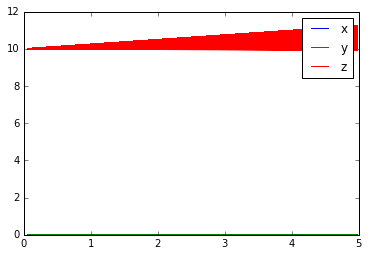

In [35]:
task = Task()
# Now train with experiences
saver = tf.train.Saver()
rewards_list = []
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    step = 0
    for ep in range(1, train_episodes):
        total_reward = 0
        t = 0
        state = task.reset()
        action = get_random_action()
        while t < max_steps:
            step += 1
            # Explore or Exploit
            explore_p = explore_stop + (explore_start - explore_stop)*np.exp(-decay_rate*step) 
            if explore_p > np.random.rand():
                # Make a random action
                action = get_random_action()
            else:
                # Get action from Q-network
                feed = {mainQN.inputs_: state.reshape(1, *state.shape)}
                Qs = sess.run(mainQN.output, feed_dict=feed)
                action = np.argmax(Qs)
            #print_func(state,action)
            #print(action)
            # Take action, get new state and reward
            next_state, reward, done   = task.step(action)
            reward = reward_function(state, task, action)
            total_reward += reward
            x = task.action_space[action]
            rotor_speeds = [x,x,x,x]
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
            if done:
                
                print('Episode: {}'.format(ep),
                      'Total reward: {}'.format(total_reward),
                      'Training loss: {:.4f}'.format(loss),
                      'Explore P: {:.4f}'.format(explore_p))
                rewards_list.append((ep, total_reward))
                state = task.reset()
                total_reward = 0
                break
            else:
                memory.add((state, action, reward, next_state))
                state = next_state
                for ii in range(len(labels)):
                    results[labels[ii]].append(to_write[ii])
            batch = memory.sample(batch_size)
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            rewards = np.array([each[2] for each in batch])
            next_states = np.array([each[3] for each in batch])
            # Train network    
            target_Qs = sess.run(mainQN.output, feed_dict={mainQN.inputs_: next_states})
            
            # Set target_Qs to 0 for states where episode ends
            episode_ends = (next_states == np.zeros(states[0].shape)).all(axis=1)
            target_Qs[episode_ends] = (0, 0,0)
            
         
            targets = rewards + gamma * np.max(target_Qs, axis=1)
            loss, _ = sess.run([mainQN.loss, mainQN.opt],
                                   feed_dict={mainQN.inputs_: states,
                                              mainQN.targetQs_: targets,
                                              mainQN.actions_: actions})
    saver.save(sess, "checkpoints/mountain.ckpt")




plot_movement(results)
#plot_velocity(results)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.

In [36]:
time_plot = []
reward_plot = []
for x in rewards_list:
    time_plot.append(x[0])
    reward_plot.append(x[1])

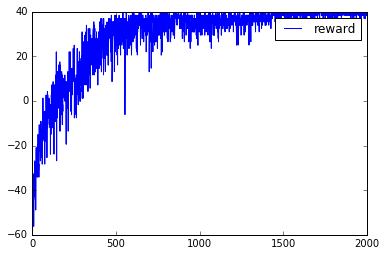

In [37]:
plt.plot(time_plot, reward_plot, label='reward')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The task is to lift off the quadcop is on the z pos at 10 and has to get to the position z 25
The reward function was so defined if the agent is lower then the target position and is going up 
the agent gets a positive reward else he gets a negative 

see reward_function

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

First I tried the actor and Critic but it was really hard had I lot of issues and error 
Than I had the idea I should also work with the Deep Q Learning and it was working fine


I tried several parameter but with those a god the best results
but ofcourse the could be better one which I didn't tried

train_episodes = 2000          # max number of episodes to learn from
max_steps = 200                # max steps in an episode
gamma = 0.99                   # future reward discount

# Exploration parameters
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.0001            # exponential decay rate for exploration prob

# Network parameters
hidden_size = 64               # number of units in each Q-network hidden layer
learning_rate = 0.0001         # Q-network learning rate

# Memory parameters
memory_size = 10000            # memory capacity
batch_size = 20                # experience mini-batch size
pretrain_length = batch_size   # number experiences to pretrain the memory

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

I put a lot of constrants to the learning process thats why the agent was learing pretty quickly
The four rotors getting the same speed so the quadcop was going straight up or down

On the last 10 episodes he god max reward

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

In [ ]:
It was really hard to get started 
After trying different 